# 1. Import Dependencies

In [742]:
import pickle
import glob
import os
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import *

from tqdm import tqdm



# 2. Prepare Dataset

Import Dataset

In [743]:
df = pd.read_csv("../features_data/resized_512_512/deletion/RGB + LBP + GLRLM + TAMURA.csv")
df.head()

,Image,mean_r,mean_g,mean_b,std_r,std_g,std_b,skew_r,skew_g,skew_b,...,LGLRE_deg135,HGL_deg135,SRLGLE_deg135,SRHGLE_deg135,LRHGLE_deg135,coarseness_tamura,contrast_tamura,directionality_tamura,roughness_tamura,label
0,AAA1,41.027203,38.404949,39.610519,90.944240,86.663675,88.720233,1.828011,1.849696,1.837585,...,0.148525,27488.718651,0.112138,25079.907652,110319.487881,5.122837,60.819979,455.674289,65.942816,normal
1,AAB1,52.045292,47.297070,49.225353,99.516999,91.817989,95.370698,1.439013,1.460648,1.452620,...,0.129932,30847.957950,0.095740,29275.474450,38531.902584,5.973164,71.046644,506.896717,77.019808,abnormal
2,AAE1,49.431889,45.006203,44.285549,98.744445,90.891439,89.479803,1.533130,1.553299,1.557812,...,0.137174,32331.635905,0.095035,29001.686142,52129.372589,6.758305,68.482548,546.900737,75.240852,abnormal
3,AAG1,31.583210,23.540051,23.628284,79.993987,61.471016,61.669728,2.264236,2.305495,2.308245,...,0.203947,15230.313138,0.139457,14025.076930,22005.549754,7.031239,42.315921,660.799305,49.347159,normal
4,AAI1,56.345428,49.022411,52.155960,101.426272,90.362273,95.872572,1.325217,1.344643,1.337805,...,0.164640,23652.077062,0.121177,22599.722407,28452.862391,6.817360,72.834257,221.910821,79.651617,abnormal


In [744]:
df.shape

(162, 60)

Split Dataset Into X and y

In [745]:
X = df.drop(columns=['Image', 'label'], axis='columns')
X.shape

(162, 58)

In [746]:
X.head()

,mean_r,mean_g,mean_b,std_r,std_g,std_b,skew_r,skew_g,skew_b,mean_lbp,...,RP_deg135,LGLRE_deg135,HGL_deg135,SRLGLE_deg135,SRHGLE_deg135,LRHGLE_deg135,coarseness_tamura,contrast_tamura,directionality_tamura,roughness_tamura
0,41.027203,38.404949,39.610519,90.944240,86.663675,88.720233,1.828011,1.849696,1.837585,221.704769,...,0.539848,0.148525,27488.718651,0.112138,25079.907652,110319.487881,5.122837,60.819979,455.674289,65.942816
1,52.045292,47.297070,49.225353,99.516999,91.817989,95.370698,1.439013,1.460648,1.452620,212.647846,...,0.682381,0.129932,30847.957950,0.095740,29275.474450,38531.902584,5.973164,71.046644,506.896717,77.019808
2,49.431889,45.006203,44.285549,98.744445,90.891439,89.479803,1.533130,1.553299,1.557812,219.877365,...,0.571259,0.137174,32331.635905,0.095035,29001.686142,52129.372589,6.758305,68.482548,546.900737,75.240852
3,31.583210,23.540051,23.628284,79.993987,61.471016,61.669728,2.264236,2.305495,2.308245,218.813881,...,0.600800,0.203947,15230.313138,0.139457,14025.076930,22005.549754,7.031239,42.315921,660.799305,49.347159
4,56.345428,49.022411,52.155960,101.426272,90.362273,95.872572,1.325217,1.344643,1.337805,197.567841,...,0.917465,0.164640,23652.077062,0.121177,22599.722407,28452.862391,6.817360,72.834257,221.910821,79.651617


In [747]:
y = df['label']
y.shape

(162,)

Split Data Into X_train, X_test, y_train, y_test

In [748]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Scaling X_train and X_test

In [749]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. Classification

In [750]:
gdb_model = GradientBoostingClassifier(
    n_estimators=300, 
    learning_rate=0.01, 
    max_features=3, 
    max_depth=2,
    random_state=123)

Train Model

In [751]:
gdb_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=2, max_features=3,
                           n_estimators=300, random_state=123)

Test Model

In [752]:
y_pred = gdb_model.predict(X_test)

In [753]:
score = gdb_model.score(X_test, y_test)
score

0.8787878787878788

# 4. Evaluate Model

Confussion Matrix

In [754]:
cm = confusion_matrix(y_test, y_pred)
label_names = gdb_model.classes_

Visualize Confussion Matrix

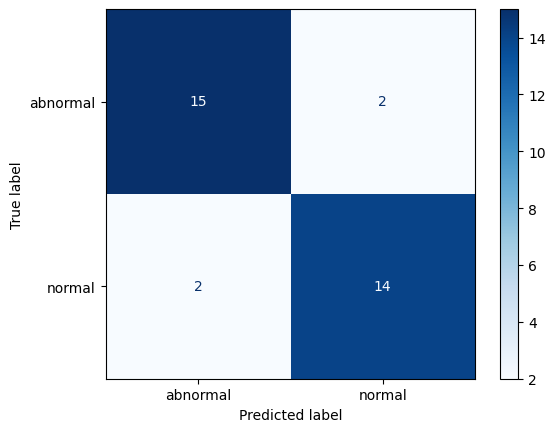

In [755]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
disp.plot(cmap='Blues')
plt.show()

Calculate Performance Metrics

In [756]:
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
recall = tp / (tp + fn)
precision = tp / (tp + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)
f1 = 2 * (precision * recall) / (precision + recall)

performance_metrics = {
    'Metric': ['Accuracy', 'Precision', 'Specificity', 'Recall', 'F1 Score'],
    'Value': [accuracy, precision, specificity, recall, f1]
}

Visualize Performance Metrics

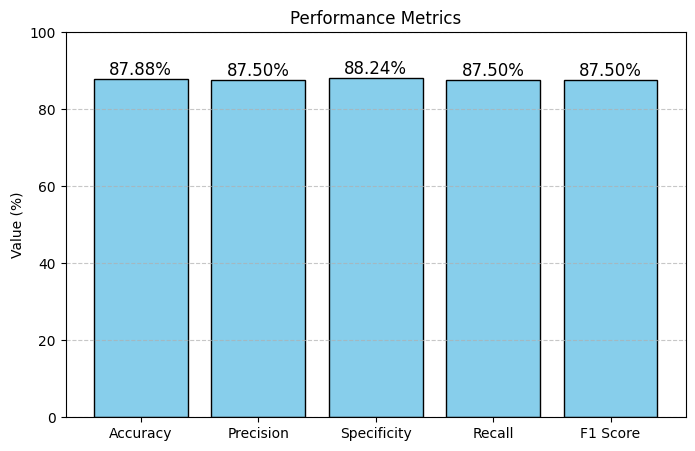

In [757]:
# Ekstrak nilai
metrics = performance_metrics['Metric']
values = np.array(performance_metrics['Value']) * 100  # Ubah ke skala 0 - 100

# Plot histogram
plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, values, color='skyblue', edgecolor='black')

# Tambahkan nilai di atas setiap bin
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom', fontsize=12)

# Label dan judul
plt.ylabel('Value (%)')
plt.title('Performance Metrics')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan plot
plt.show()

Visualize Train and Test Accuracy

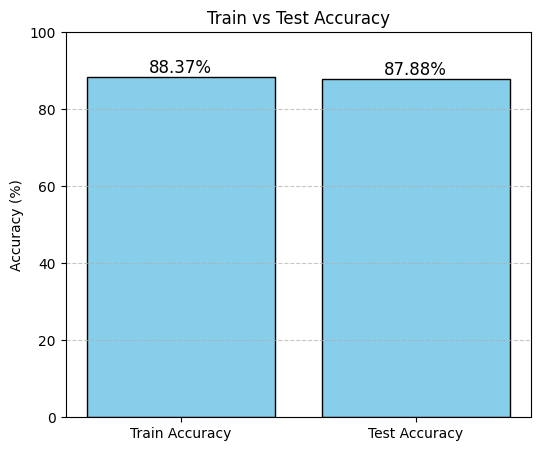

In [758]:
# Train vs Test Accuracy
train_accuracy = gdb_model.score(X_train, y_train) * 100
test_accuracy = gdb_model.score(X_test, y_test) * 100

accuracy_metrics = {
    'Metric': ['Train Accuracy', 'Test Accuracy'],
    'Value': [train_accuracy, test_accuracy]
}

# Ekstrak nilai
accuracy_labels = accuracy_metrics['Metric']
accuracy_values = accuracy_metrics['Value']

# Plot histogram untuk train vs test accuracy
plt.figure(figsize=(6, 5))

bars = plt.bar(accuracy_labels, accuracy_values, color='skyblue', edgecolor='black')
# Tambahkan nilai di atas setiap bin
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom', fontsize=12)

# Label dan judul
plt.ylabel('Accuracy (%)')
plt.title('Train vs Test Accuracy')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan plot
plt.show()

Feature Importances

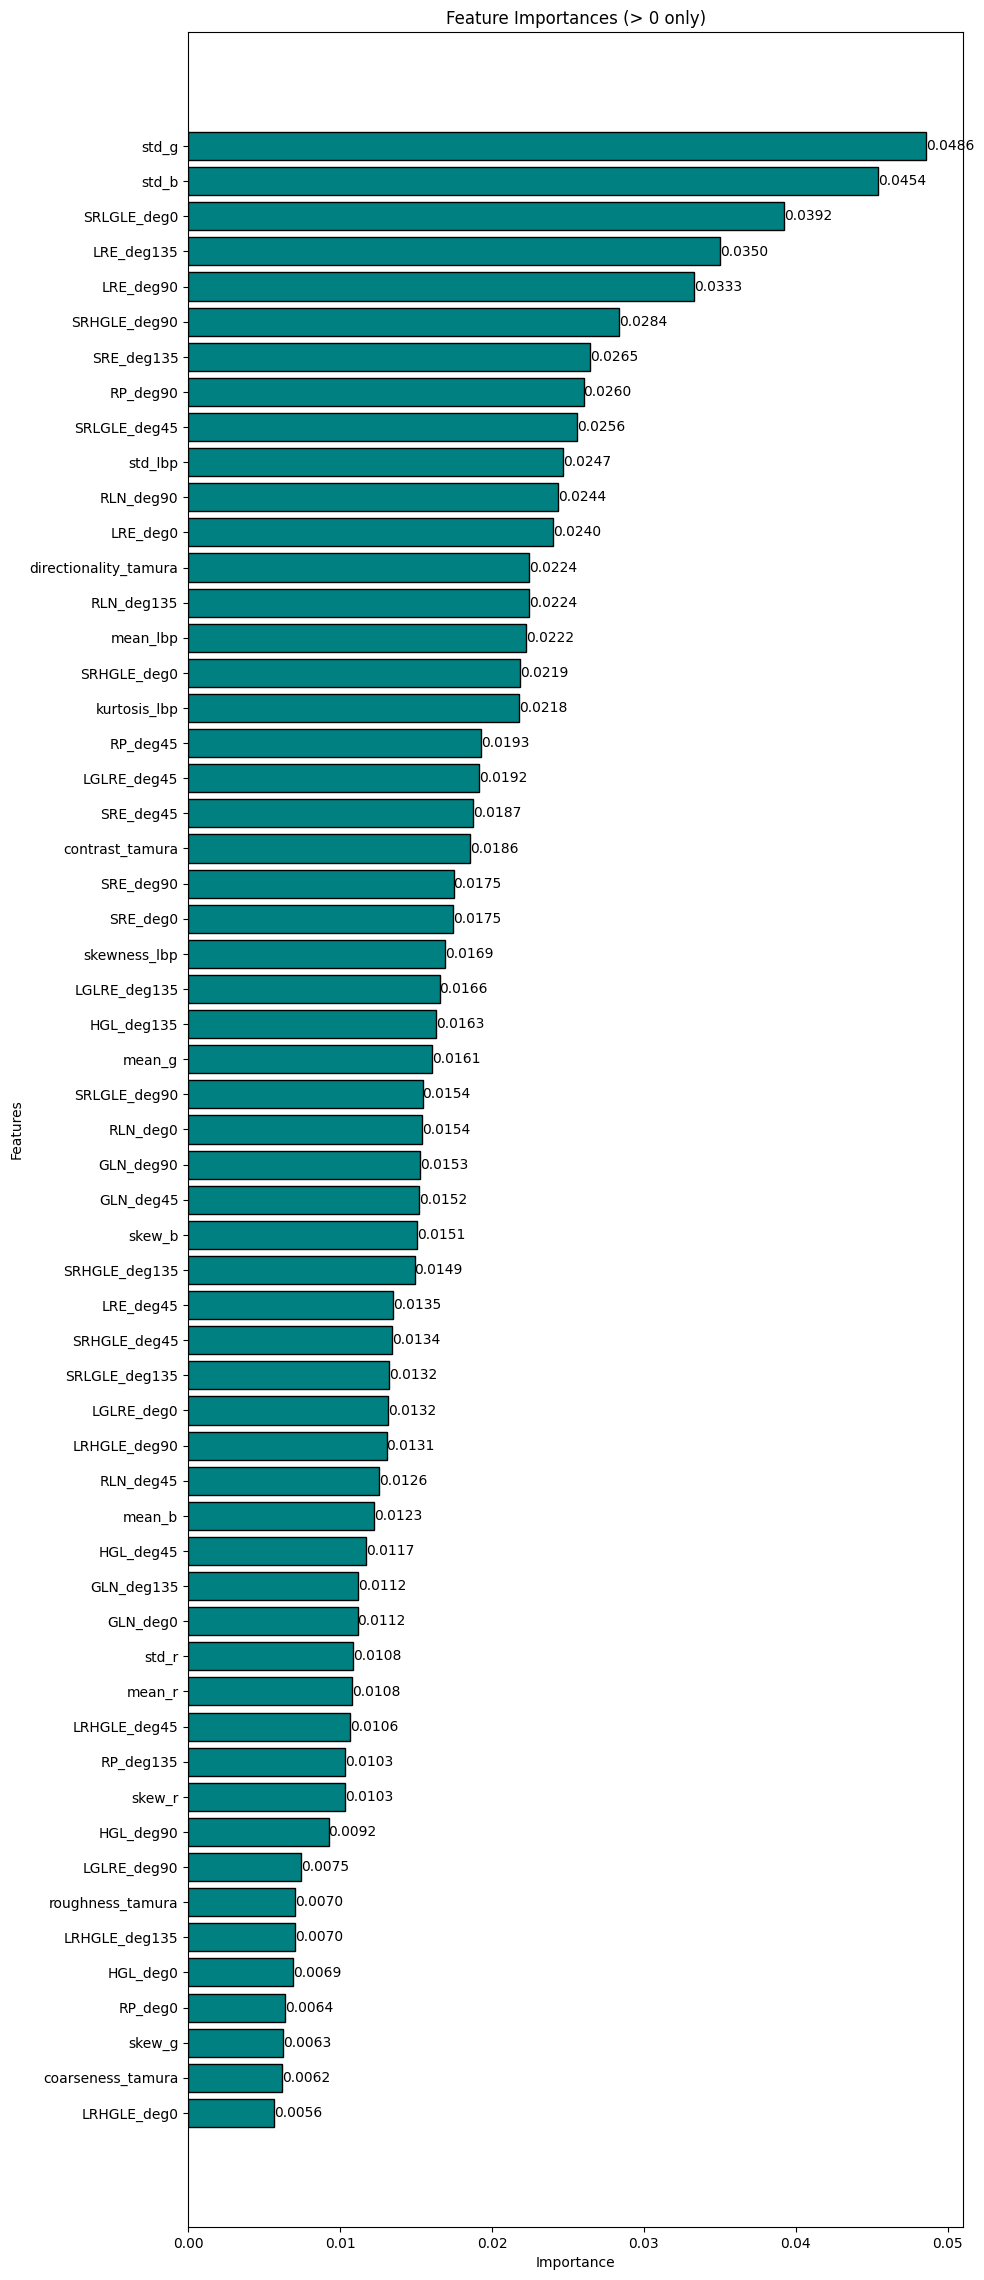

In [759]:
importances = gdb_model.feature_importances_
feature_names = X.columns  # Menggunakan nama fitur yang benar

# Filter fitur dengan importance > 0
mask = importances > 0
filtered_importances = importances[mask]
filtered_features = np.array(feature_names)[mask]

# Urutkan dari yang terbesar ke terkecil
sorted_indices = np.argsort(filtered_importances)[::-1]
sorted_importances = filtered_importances[sorted_indices]
sorted_features = filtered_features[sorted_indices]

# Plot hasilnya
plt.figure(figsize=(10, len(sorted_features) * 0.5))  # Menyesuaikan tinggi gambar
plt.barh(sorted_features, sorted_importances, color='teal', edgecolor='black')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances (> 0 only)')
plt.gca().invert_yaxis()  # Membalikkan urutan agar fitur terpenting di atas

# Tambahkan nilai di samping setiap bar
for index, value in enumerate(sorted_importances):
    plt.text(value, index, f'{value:.4f}', va='center', fontsize=10)

plt.show()

In [760]:
# Filter fitur dengan importance = 0
zero_importance_features = feature_names[importances == 0]

# Cetak hasilnya dalam bentuk array
print(zero_importance_features)

Index(['median_lbp'], dtype='object')
